# CS 237 Fall 2018, Homework 11

### Due date: PDF file due Friday December 6th @ 11:59PM in GradeScope with 12-hour grace period

### No late submissions accepted

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

You may use ordinary ASCII text to write your solutions, or (preferably) Latex. A nice introduction to Latex in Jupyter notebooks may be found here: http://data-blog.udacity.com/posts/2016/10/latex-primer/

As with previous homeworks, just upload a PDF file of this notebook. Instructions for converting to PDF may be found on the class web page right under the link for homework 1.

In [77]:
# General useful imports
import numpy as np
from numpy import arange,linspace,mean, var, std, corrcoef, transpose, ones,log
from numpy.linalg import inv
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from numpy.random import random, randint, uniform
import math
from collections import Counter
import pandas as pd
%matplotlib inline

# Basic Numpy statistical functions

X = [1,2,3]

# mean of a list
mean(X)             # might need to use np.mean, np.var, and np.std

# population variance
var(X)

# sample variance    ddof = delta degrees of freedom, df = len(X) - ddof
var(X,ddof=1)                 

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Scipy statistical functions

# Scipy Stats Library Functions, see:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html


# Calculate the correlation coefficient rho(X,Y)


def rho(X,Y):
    return corrcoef(X,Y)[0][1]

def R2(X,Y):
    return corrcoef(X,Y)[0][1] ** 2

# Utility functions

        
# Round to 2 decimal places
def round2(x):
    return round(float(x)+0.00000000001,2)

# Round to 4 decimal places
def round4(x):
    return round(float(x)+0.00000000001,4)

def round4List(X):
    return [round(float(x)+0.00000000001,4) for x in X]

def probToPercent(p):
    pc = p*100
    if round(pc) == pc:
        return str(round(pc)) + "%"
    else:
        return str(round(pc,2))+ "%"


## Homework 11 General Instructions

This homework contains programming problems with some commentary on interpreting the results. Its goal is simply to exercise your understanding of regression and Monte Carlo algorithms, as covered in lecture before Thanksgiving break. 

## Problem One: Linear Regression

For this problem, in Part A you will fill in the template for a function
that draws a scatterplot, the linear regression line, the midpoint, and the relevant statistics, as shown in lecture. In lab 9, problem 1, you drew a diagram just to practice using the matplotlib library, and you may want to refer to your solution to get started. 

For  Part B you will simply draw the regression line and residual plot for some data related to our class (anonymous of course!). For Part C you will think about what you are seeing and answer some questions about the data and whether a linear model is appropriate for this data.  

### Part A  (Farentheit vs Celsius)

Complete the following template to draw the example Farenheit/Celsius data from lecture

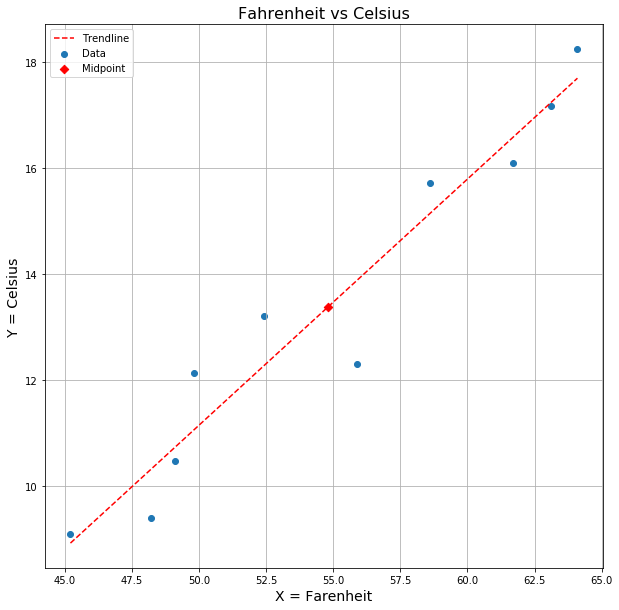

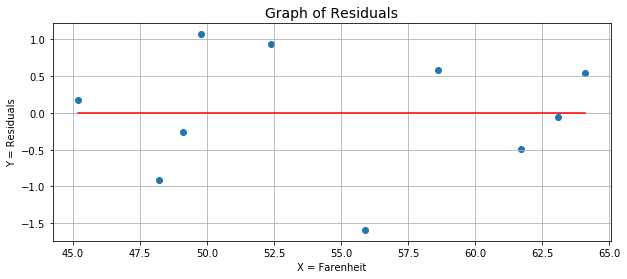


mean(x):	54.81	std(x):	6.4623
mean(y):	13.3875	std(y):	3.1037

rho:   0.9664	R^2:   0.9339

Residual SS:   6.3631	Explained SS: 89.9635	Total SS:   96.3265

Regression Line: y = 0.4641 * x - 12.0519


In [78]:
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)
    
def LinearRegression(X,Y,titl="Linear Regression", xlab="X",ylab="Y"):

    n = len(X)
    
    # Calculate stats and values m (theta1) and b (theta0)
    
    mux = mean(X)      # your code here, use statistical functions as shown above
    muy = mean(Y)
    stdx = std(X)
    stdy = std(Y)
    r = rho(X,Y)      # rho
    r2 = r**2     # r^2
   
   
    # Predicted values from regression line
    m = r * stdy / stdx
    b = muy - m*mux
    Yhat = [(m*X[i]+b) for i in range(n)]
   
    # Residuals
   
    E = [(Y[i] - Yhat[i]) for i in range(n)]
   
    # residual sum of squares -- deviations of data from line
    rss = sum([e**2 for e in E])
   
    # explained sum of squares -- deviation of line from mean of y
    ess = sum([(Yhat[i] - muy)**2 for i in range(n)])
   
    # total sum of squares -- deviation of data from mean of y
    tss = sum([(Y[i] - muy)**2 for i in range(n)])
    
    plt.figure(figsize=(10,10))
    plt.grid()

    plt.scatter(X,Y,label="Data")
    plt.plot(X,Yhat,'r--',label="Trendline")
    plt.scatter([mux],[muy],marker='D',color='red',label="Midpoint")         
    plt.title(titl,fontsize=16)
    plt.legend()
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.title("Graph of Residuals",fontsize=14)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel("Y = Residuals")
    Yhat = [0 for x in X ]
    plt.scatter(X,E)
    plt.plot(X,Yhat,color='red')
    plt.show()



    print("\nmean(x):\t" + str(round4(mux)) + "\tstd(x):\t" + str(round4(stdx)))
    print("mean(y):\t" + str(round4(muy)) + "\tstd(y):\t" + str(round4(stdy)))
    print("\nrho:   " + str(round4(r)) + "\tR^2:   " + str(round4(r2)))
    print("\nResidual SS:   " + str(round4(rss)) + "\tExplained SS: " + str(round4(ess)) + "\tTotal SS:   " + str(round4(tss)))    
    
    if(b >= 0):
        print("\nRegression Line: y = " + str(round4(m)) + " * x + " + str(round4(b)))
    else:
        print("\nRegression Line: y = " + str(round4(m)) + " * x - " + str(round4(-b)))       

Xfarenheit = [45.2, 48.2, 49.1, 49.8, 52.4, 55.9, 58.6, 61.7, 63.1, 64.1] 
Ycelsius = [9.0994, 9.4023, 10.4809, 12.132, 13.2032, 12.303, 15.7304, 16.1, 17.1773, 18.2468]


LinearRegression(Xfarenheit,Ycelsius,"Fahrenheit vs Celsius",xlab="X = Farenheit",ylab="Y = Celsius")


### Now we will test our regression skills on some data from our class....

In [79]:
studs = pd.read_csv('http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/classdata.csv')
print(studs[:10])

    GPA  Midterm  HWAvg
0  3.51     86.0  86.29
1  3.34     91.0  51.18
2  3.94     92.0  94.06
3  3.20     78.0  38.82
4  3.91     97.0  89.18
5  3.59     92.0  88.76
6  3.17     97.0  68.65
7  3.45     97.0  55.06
8  3.45     84.0  92.47
9  3.50     94.0  89.76


In [80]:
GPA = studs['GPA']
MID = studs['Midterm']
HWS = studs['HWAvg']

### Part B (GPA vs HWS)

Apply the function from Part A to the following data:

     X = GPA
     Y = HWS


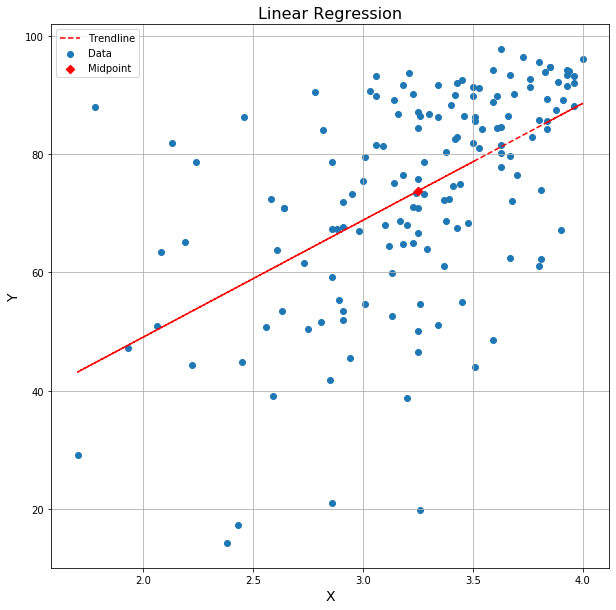

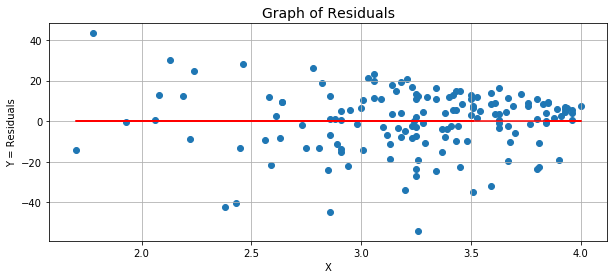


mean(x):	3.249	std(x):	0.4903
mean(y):	73.7222	std(y):	18.0138

rho:   0.5371	R^2:   0.2885

Residual SS:   35093.5105	Explained SS: 14229.7885	Total SS:   49323.299

Regression Line: y = 19.7359 * x + 9.6


In [81]:
LinearRegression(GPA,HWS)

### Part C


Looking at the data and the statistics for Part B, answer the following questions to the best of your ability:

<blockquote>
    (i) Just looking at the graphical display of the data, would you think there is
        a linear trend to this data, i.e., is there a correlation between
        GPA and homework scores in CS 237? What do you see?
</blockquote>

<blockquote>
   (ii) Now, what does the $R^2$ value tell you about fitting a linear model to this data?
</blockquote>

Linear regression isn't always appropriate, and not only because of the $R^2$ score.  Please read through the following page outlining the principal conditions necessary for linear regression:

https://www.statisticshowto.datasciencecentral.com/assumptions-conditions-for-regression/

<blockquote>
   (iii) Do you see any other problems, related to the conditions you read about above? (Hint: look at the residual plot).) Can you think of any reason why this might be the case for this data set? (Hint: Just answer these by "eyeballing" the data, don't worry about doing a precise analysis.)
</blockquote>

Solution for C:

(i) There is a linear trend to this data. We can notice the positive correlation between GPA and homework scores in CS237. As GPA increases, HW score also increases.

(ii) The R^2 = 0.2885 value tells us that 28.85% of the variation in Y  is reduced by taking into the account predictor X.

(iii) We can see problems related the data on the residual plot. I see problems with outliers and heteroscedasticity.


## Problem Two: Linear Regression

Now we will look at pairing the Midterm Score data with GPA. Again, you will apply your function from Problem One (A) to display the data and statistics, and then think about what you are seeing. 

### Part A  (GPA vs MID)

Apply the function from Part A to the following data:

     X = GPA
     Y = MID

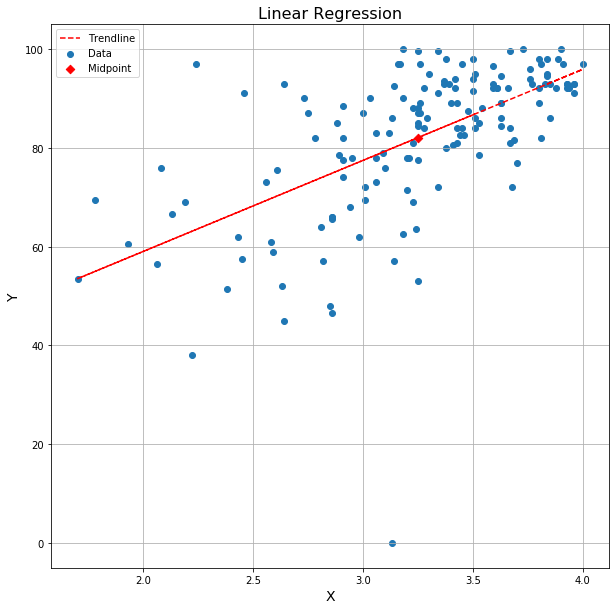

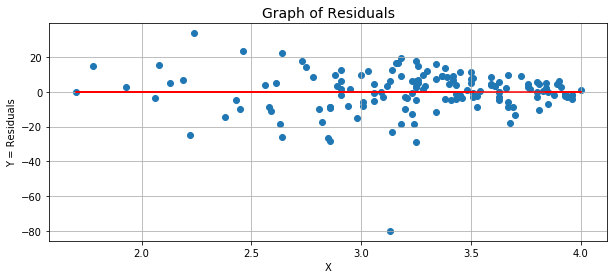


mean(x):	3.249	std(x):	0.4903
mean(y):	82.0296	std(y):	15.1626

rho:   0.5952	R^2:   0.3542

Residual SS:   22567.1516	Explained SS: 12378.4652	Total SS:   34945.6168

Regression Line: y = 18.4073 * x + 22.2239


In [82]:
LinearRegression(GPA,MID)

### Part B (Dealing with Outliers: GPA2 vs MID2)

In Part A there is clearly a violation of one of the conditions for linear regression, in that there is an outlier in the Midterm data, because of a student in the data that didn't take the midterm and then at some point dropped the class. It is always a serious question whether an inconvenient data point is really an outlier, but in this case it is clear that if a student dropped the class, then the data on homeworks AND midterm are not really relevant to what we want to know, which is the relationship between GPA and performance in two parts of the class marks for those who complete the class.  

The outlier occurs at index 128:  

In [83]:
print(studs[125:132])

      GPA  Midterm  HWAvg
125  3.81     82.0  62.29
126  3.84     95.0  84.24
127  2.95     78.0  73.24
128  3.13      0.0  52.59
129  3.30     95.0  86.82
130  3.59     96.5  48.53
131  2.85     48.0  41.82


Eliminate this data point from ALL three lists and call the new sets GPA2, HWS2, and MID2. [Hint: check out the <code>del</code> function in Python.]

Now display the data for GPA2 vs MID2 (as in Part A, but with the outlier removed). 

In [84]:
GPA2 = list(GPA)
HWS2 = list(HWS)
MID2 = list(MID)


GPA2 = GPA2[:128] + GPA2[129:]

HWS2 = HWS2[:128] + HWS2[129:]

MID2 = MID2[:128] + MID2[129:]

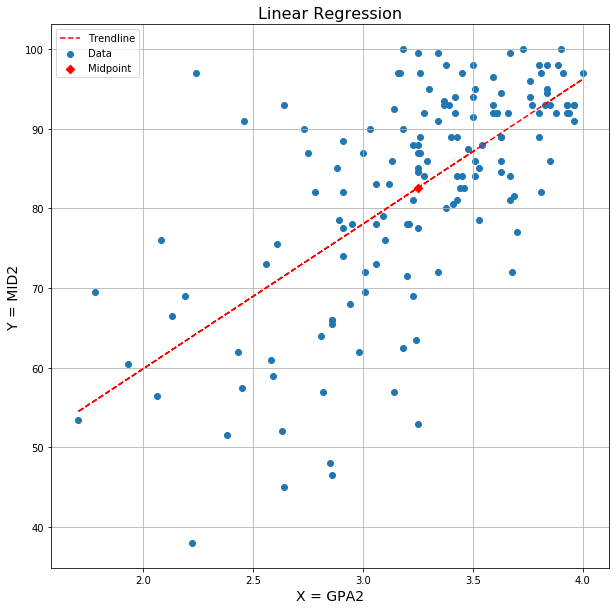

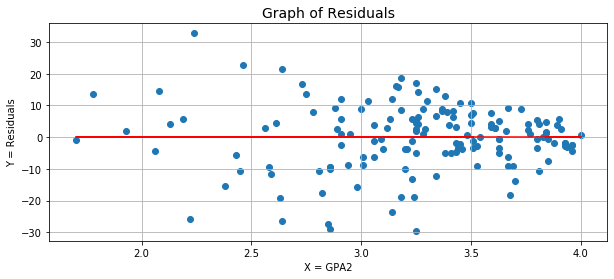


mean(x):	3.2498	std(x):	0.4918
mean(y):	82.5728	std(y):	13.6591

rho:   0.6533	R^2:   0.4268

Residual SS:   16148.1846	Explained SS: 12024.0141	Total SS:   28172.1987

Regression Line: y = 18.1454 * x + 23.6038


In [138]:
LinearRegression(GPA2,MID2,xlab="X = GPA2", ylab="Y = MID2" )


### Part C (GPA2 vs HWS2)

Well, now we could wonder whether this new data (with one student eliminated who dropped the class) would change our results in Problem One. Redo the data display from Problem One (B) with this new data. 

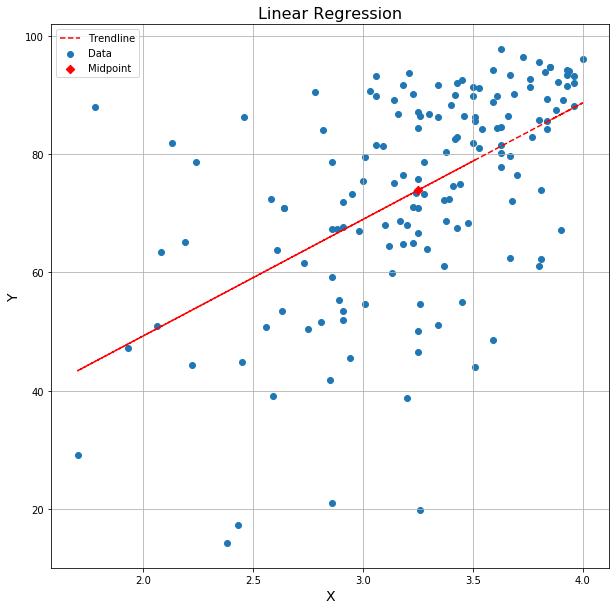

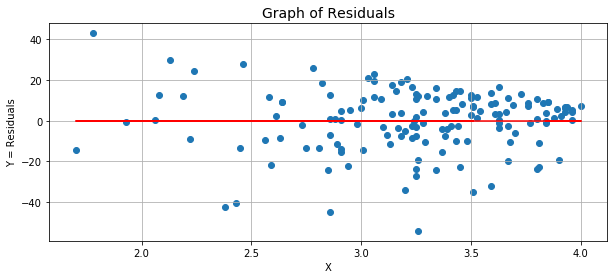


mean(x):	3.2498	std(x):	0.4918
mean(y):	73.8621	std(y):	17.9908

rho:   0.5378	R^2:   0.2892

Residual SS:   34738.2215	Explained SS: 14135.5514	Total SS:   48873.7729

Regression Line: y = 19.6743 * x + 9.9246


In [86]:
LinearRegression(GPA2,HWS2)

### Part D

Now answer the following questions:

<blockquote>
    (i) How much did removing the outlier affect our results with GPA vs MID 
    (Problem 2 A compared with 2 B)? In particular, look at $ var(y)$ and the $R^2$ value. 
</blockquote>
<blockquote>
    (ii) What does this say (with this one example as evidence) about the sensitivity of $R^2$ to outliers in the data set?
</blockquote>    
<blockquote>
    (iii) How what you saw in 2 C differ with what you saw with Problem One (B)? 
</blockquote> 
    

Solution for D:

i) As we saw, removing the outlier affected our r^2 value, increased from 0.3542 to 0.4268. The value of var(y) went from 229.9044 to 186.5710

ii)r^2 is sensitive to outliers, however a single outlier would not increase r^2 by much.

iii)The value of r^2 increased from 0.2885 to 0.2892.It is a very small increase, because we only removed one outlier. 

## Problem Three: Linear Regression  

In this last problem on linear regression you will finish your analysis by comparing HWS2 and MID2 data, using the regression line to do some prediction,  and thinking about what you have seen in all the problems so far. 

### Part A

Apply the function from Problem One A to the following (modified) data:

     X = HWS2
     Y = MID2
     

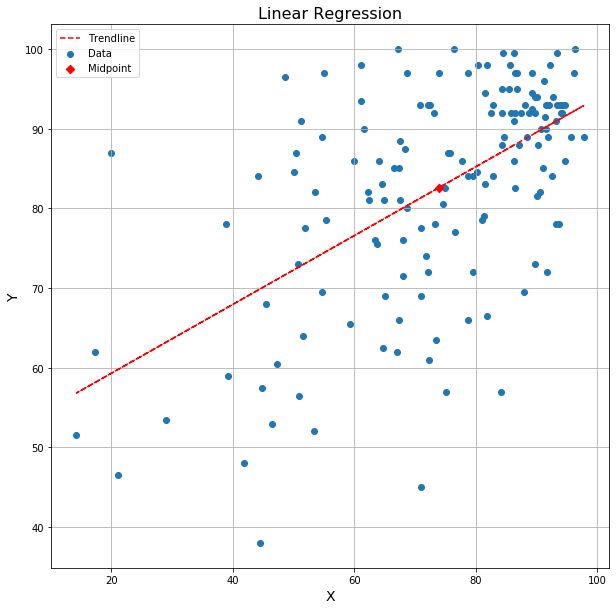

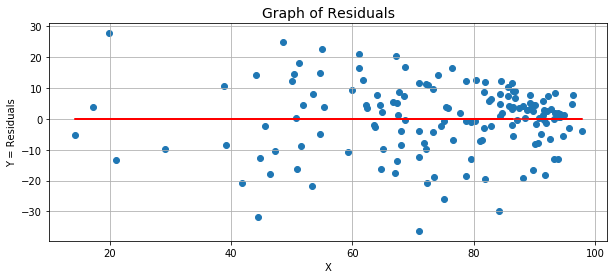


mean(x):	73.8621	std(x):	17.9908
mean(y):	82.5728	std(y):	13.6591

rho:   0.5688	R^2:   0.3235

Residual SS:   19058.132	Explained SS: 9114.0667	Total SS:   28172.1987

Regression Line: y = 0.4318 * x + 50.6766


In [87]:
LinearRegression(HWS2,MID2)

### Part  B

We eliminated a student from the class who dropped the course before the midterm. Hm, I wonder how our model would have predicted his/her score for homeworks (for which we have a score) and midterm (for which we don't)? We will use the corrected values, after we removed the outlier (HWS2, MID2, GPA2). 

The outlier student had the following values:

      GPA:             3.13
      Midterm:         0.0
      HWAvg:           52.59

<blockquote>
(i) Calculate, based on the appropriate regression equation, what the midterm score would be predicted to be for this student based on the GPA.
</blockquote>

<blockquote>
(ii) Using the regression line for HWS2 vs MID2, what would be the prediction for the midterm score be for this student based on his/her homework average? How well does this compare with the value from (i)? 
</blockquote>
(iii) Do you have any explanation for the results? (Hint: remember that the student dropped the class.)
</blockquote>


Solution for B:

i)  y = 18.4073 * x + 22.2239

 x = 3.13 (GPA)
 
 y = 18.4073 * 3.13 + 22.2239
 
 y = 79.8387
 
ii) y = 0.4318 * x + 50.6766
  
  x = 52.59(HWAvg)
  
  y = 0.4318 * 52.59 + 50.6766 
  
  y = 73.3850
  
  This value is slightly lower than what we have calculated in (i) I assume it is because the regression line that we use determine the predicted midterm score by the use of HW grade.

iii)I assume it is because the student was not particularly doing well on the hw's and decided to drop the class. This explains his midterm grade of 0. The reason regression line using GPA gave us a better score, is because the student might be doing well in other classed and therefore the predicted midterm grade was higher.

### Part  C

Answer the following questions in a short sentence or two: 

<blockquote>
(i) Did you see any other problems with the necessary conditions for linear regression in the other pairings of data from this set?
</blockquote>

<blockquote>
(ii) Let us consider these three pairs of data, after eliminating the outlier but not worrying about any of the other conditions for linear regression. Using the $R^2$ value, in what order do you put them from weakest to strongest linear relationship? What do you think might be the causes for them being ordered in this way? Is there anything surprising about this?   How certain are you of your conclusions, based on the $R^2$ values?
</blockquote>

i) There are problems with conditions for linear regression in the ther pairings of data(heteroscedasticity problem).

ii) We will compare three from weakest to strongest:

1) $R^2$ = 0.2892 (GPA2 VS HWS2)  
2) $R^2$ = 0.3235 (HWS2 VS MID2)  
3) $R^2$ = 0.4268 (GPA2 VS MID2)

As we know, GPA is the total grade over all the classed taken in the university, not just in the CS237. This means that the $R^2$ value would be less that the rest when it is used as a predictor for the HWAver. The reason GPA2 vs MID2 has the highest $R^2$ value is because of the fact that students who do well in other classes will most likely also do well in the CS237 midterm. Because of our small $R^2$ values we cannot be certain of our conclusions.

## Problem Four Multiple Linear Regression

In this problem we will apply the technique of multiple linear regression to some data from a class and predict some values from the regression plane. The next cell contains the code for displaying the regression plane.

Run this cell and observe how it creates a series of 3D views of the linear regression plane. 


Regression Plane:  y = 21.2987 + 13.5759 * x1 + 0.2323 * x2


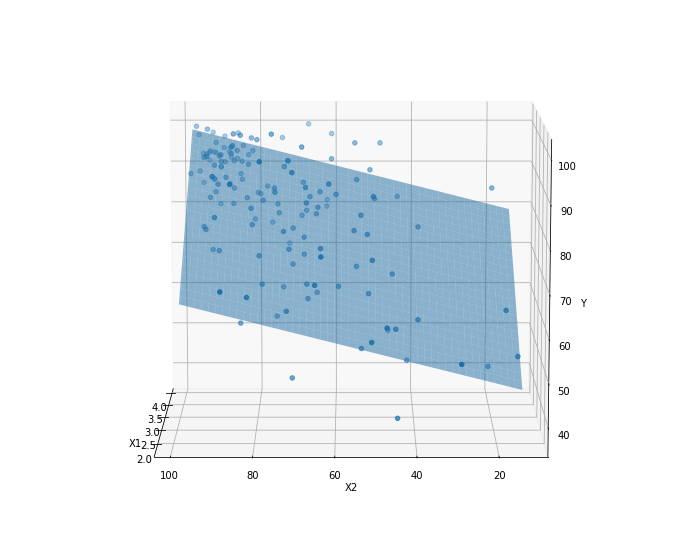

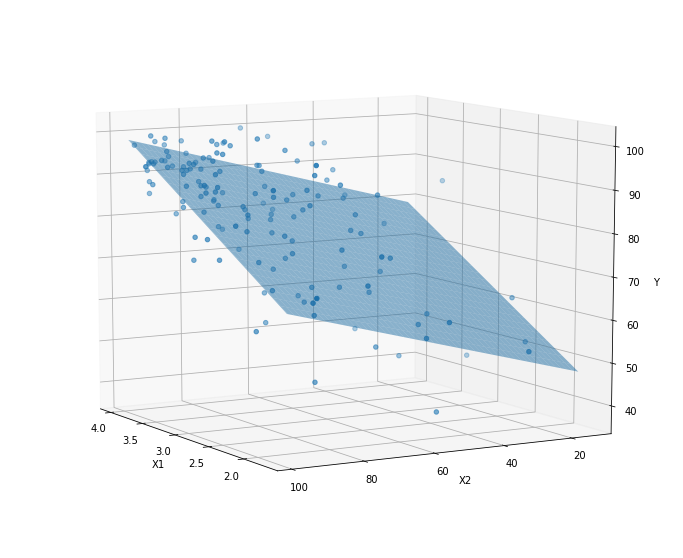

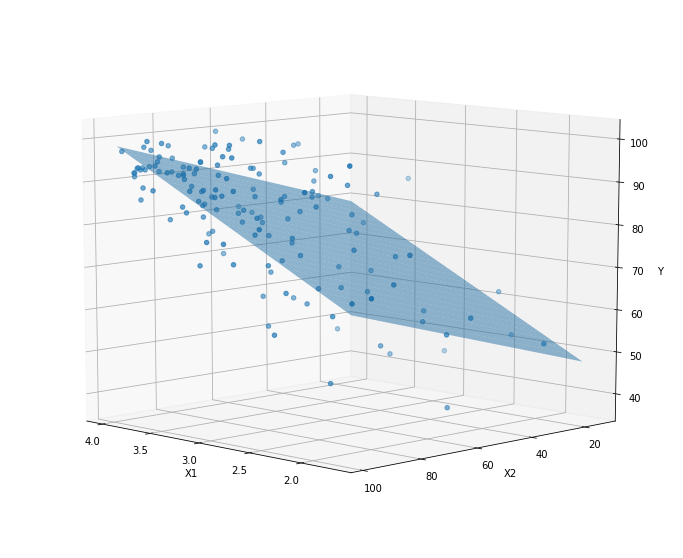

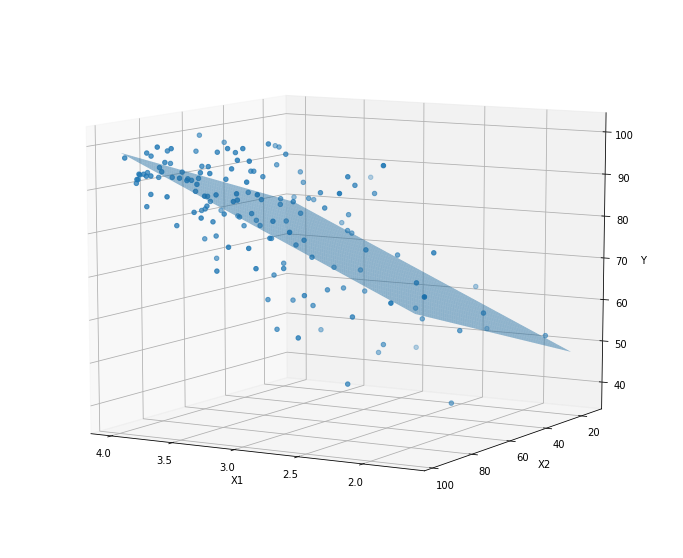

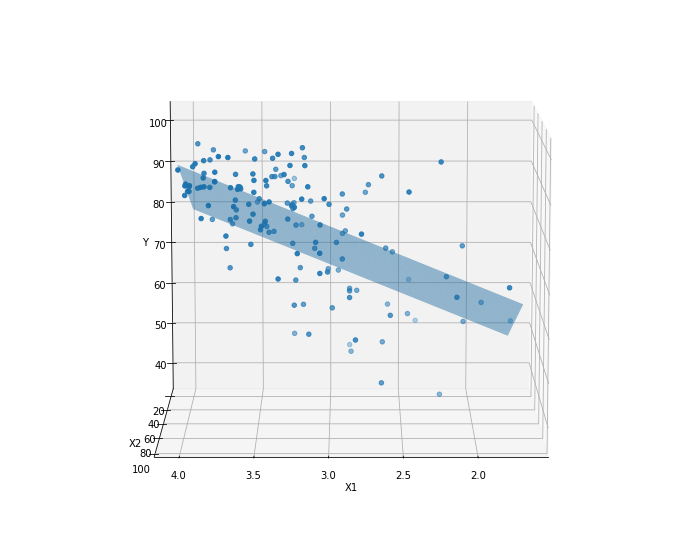

In [88]:

# Given data vectors X and Y (must be same length), calculate the vector Theta
# which contains the parameters produced by regression. 

def getTheta(X,Y):
    return inv(X.T @ X) @ X.T @ Y

def multiple_regression(X1,X2,Y,verbose=False,el=10,az=180):
    
    # make sure they are numpy arrays
    X1 = np.array(X1)
    X2 = np.array(X2)
    Y = np.array(Y)
    
    # Collect the dependent variables and add the bias term 1 to front
    X = transpose([ones(len(X1)),X1,X2])
        
    Theta = getTheta(X,Y)

    if verbose:
        print("\nRegression Plane:  y = " + str(round4(Theta[0])) + " + " 
                                          + str(round4(Theta[1])) + " * x1 + " 
                                          + str(round4(Theta[2])) + " * x2")

    # Plot the surface.
    Xplot = np.arange(min(X1), max(X1)+0.1, 0.1)
    Yplot = np.arange(min(X2), max(X2)+0.1, 0.1)
    Xplot, Yplot = np.meshgrid(Xplot, Yplot)
    Zplot = np.zeros_like(Xplot)
    for r in range(len(Zplot)):
        for c in range(len(Zplot[0])):
            Zplot[r][c] = Theta[0] + Theta[1]*Xplot[r][c] + Theta[2]*Yplot[r][c]


    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=el, azim=az)

 #   ax.set_xlim(min(X),)
 #   ax.set_ylim(lo,hi)
 #   ax.set_zlim(lo,hi)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.scatter(X1,X2,Y)
    ax.plot_surface(Xplot,Yplot,Zplot,alpha=0.5)

    plt.show()

X1 = GPA2
X2 = HWS2
Y = MID2


multiple_regression(X1,X2,Y,True,el=10,az=180)
multiple_regression(X1,X2,Y,el=10,az=150)
multiple_regression(X1,X2,Y,el=10,az=135)
multiple_regression(X1,X2,Y,el=10,az=120)
multiple_regression(X1,X2,Y,el=10,az=90)

### Part A

Now we will determine which pair of data best predict the other two. Using
the formula for ESS, TSS, and $R^2$:

$$ESS\,=\,\sum_{i=0}^N (\hat{y}_i - \mu_Y)^2$$

$$TSS\,=\,\sum_{i=0}^N ({y_i} - \mu_Y)^2$$

$$R^2\,=\,\frac{ESS}{TSS}$$

and the regression equation determined for this data set:

$$  \hat{Y} = 21.2987 + 13.5759 \cdot X_1 + 0.2323 \cdot X_2$$
            
calculate the $R^2$ value for 

     X1 = GPA2
     X2 = HWS2
     Y = MID2

In [142]:
X1 = GPA2 
X2 = HWS2 
Y = MID2

yHat = [(21.2987 + 13.5759*X1[i] + 0.2323*X2[i]) for i in range(len(Y))] 

ESS = 0 
TSS = 0 
for i in range(len(Y)):    
    ESS = ESS + ((yHat[i] - mean(Y))**2)    
    TSS = TSS + ((Y[i] - mean(Y))**2) 
r2 = ESS/TSS 

print("R^2:", round4(r2))

R^2: 0.4934


### Part B

Now consider the other 2 possibilities for two of these data predicting the other one (note that you don't need to consider reordering X1 and X2), print out your results, and then answer the following question: Which had the highest correlation and was it relevant?

Hint: You will need to recalculate the regression line, look at how it is done in the function <code>multiple_regression(...)</code>. 

other possibility:
X1 = GPA2
X2 = MID2
Y = HWS2

R^2: 0.3717

Regression Plane:  y = -1.8688 + 10.6081 * x1 + 0.4996 * x2


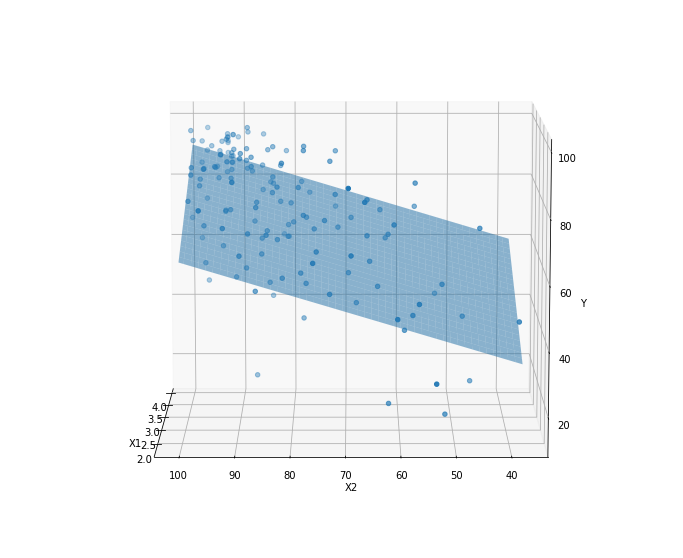


second different possibility:
X1 = MID2
X2 = HWS2
Y = GPA2

R^2: 0.4674

Regression Plane:  y = 1.227 + 0.0185 * x1 + 0.0067 * x2


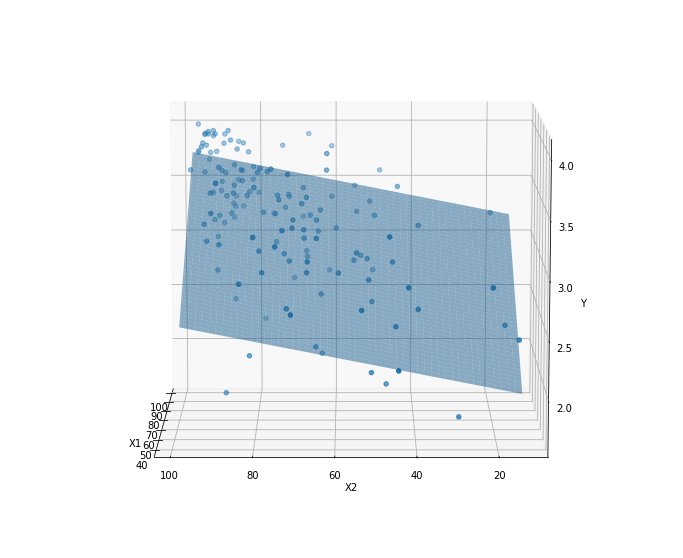

In [143]:
print("other possibility:")
X1 = GPA2
X2 = MID2 
Y = HWS2 

print("X1 = GPA2") 
print("X2 = MID2") 
print("Y = HWS2\n") 

ESS = 0 
TSS = 0 
yHat = [(-1.8688 + 10.6081*X1[i] + 0.4996*X2[i]) for i in range(len(Y))] 

for i in range(len(Y)):    
    ESS = ESS + ((yHat[i] - mean(Y))**2)    
    TSS = TSS + ((Y[i] - mean(Y))**2) 
r2 = ESS/TSS 

print("R^2:", round4(r2)) 
multiple_regression(X1,X2,Y,True,el=10,az=180) 
print() 

print("second different possibility:") 
X1 = MID2 
X2 = HWS2 
Y = GPA2 

print("X1 = MID2") 
print("X2 = HWS2") 
print("Y = GPA2\n") 

ESS = 0 
TSS = 0 
yHat = [(1.227 + 0.0185*X1[i] + 0.0067*X2[i]) for i in range(len(Y))] 

for i in range(len(Y)):    
    ESS = ESS + ((yHat[i] - mean(Y))**2)    
    TSS = TSS + ((Y[i] - mean(Y))**2) 
r2 = ESS/TSS 
print("R^2:", round4(r2)) 
multiple_regression(X1,X2,Y,True,el=10,az=180)

### Part C

Now answer the following questions:  
<blockquote>
(i) Which produced a better linear model? 
</blockquote>

<blockquote>
(ii) Were the $R^2$ values high enough to reasonably use this as a predictor of student performance?
</blockquote>

Solution for C:

i)The first case/possibility produced a better linear model because $R^2$ is 0.4934.

ii)I would say it is not that high enough to use reasonably as the predictor of student performance. 

## Problem Five: Logistic Regression

This problem will review the process of logistic regression, using an example similar to what was
shown in class. 





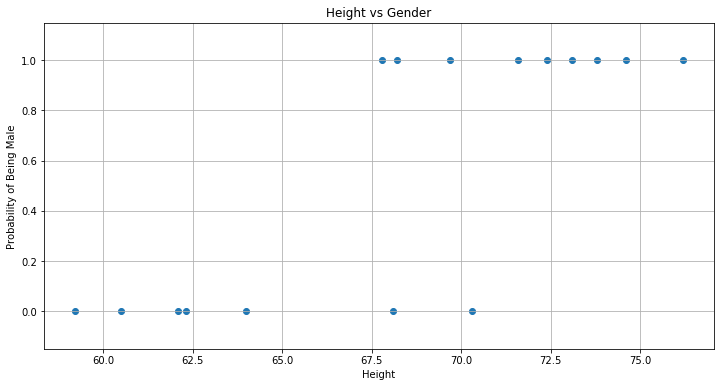

In [91]:
Height = [59.2, 60.5, 62.1, 62.3, 73.8, 64.0, 71.6, 67.8,68.1,68.2,69.7,70.3, 72.4,73.1,74.6,76.2]

Gender = [0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1]

plt.figure(figsize=(12,6))
plt.grid()
plt.title("Height vs Gender")
plt.ylim([-0.15,1.15])
plt.xlabel("Height")
plt.ylabel("Probability of Being Male")
plt.scatter(Height,Gender)
plt.show()

In [92]:
def s(z):
    return 1/(1+np.exp(-z))

def Cost(y,yHat):
    if y == 1:
        return -log(yHat)
    else:
        return -log(1 - yHat)

def h(b,m,xi):
    return b + m*xi

def J(b,m,X,Y):
    N = len(X)
    res = 0
    for k in range(len(X)):
        res += Cost(Y[k],s(h(b,m,X[k])))
        
    return res/N

def update_weights(b,m, X, Y, blam,mlam,verbose=False):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        m_deriv += X[i] * (s(h(b,m,X[i])) - Y[i])
        b_deriv += (s(h(b,m,X[i])) - Y[i])
    m_deriv /= N
    b_deriv /= N
    # We subtract because the derivatives point in direction of steepest ascent
    m -= m_deriv * mlam
    b -= b_deriv * blam 

    return b,m,b_deriv,m_deriv

def Bderiv(b,m,X,Y):
    (b,m,bd,md) = update_weights(b,m,X,Y,0.001,0.001)
    return bd

def Mderiv(b,m,X,Y):
    (b,m,bd,md) = update_weights(b,m,X,Y,0.001,0.001)
    return md

def gradient_descent(b,m,X,Y,blam,mlam,limit,verbose=False):
    blast = b
    mlast = m
    inc = int(limit/10)
    for k in range(limit):
        (b,m,bd,md) = update_weights(blast,mlast,X,Y,blam,mlam,verbose)
        if verbose and (k % inc == 0): 
            #print("  b_deriv = ",bd," \tm_deriv = ",md)
            #print("  b_delta = ",(b-blast),"\tm_delta = ",(m-mlast))
            print("b = ",b,"\tm = ",m, "J = ", J(b,m,X,Y))
        blast = b
        mlast = m
    return (b,m)

       

### Part A

Fill in the following code template, which returns the probability that a person is male,
given the height and the parameters m and b as input. Hint: It will involve h and s. 

In [93]:
# Given an x-axis value for height, what is the prediction that is male?
def predict(b,m,x):
    v = h(b,m,x)
    result = s(v)
    return result        
# Your code here 

### Part B

Now run the gradient descent algorithm to find the best values for
$m$ and $b$. Experiment with different values for limit, mlam, and blam.
The code will print out the results ten times during the calculation.

You should be able to get values close to $m=\frac{2}{3}$ and $b = -45.$

In [94]:
limit = 10**5           # Try as large as you can on your machine!

mlam = 0.005
blam = 0.1

b = 0
m = 1

verbose = True
print("\nb = ",b,"\t\t\tm = ",m)
(b1,m1) = gradient_descent(b,m,Height,Gender,blam,mlam,limit,verbose)
print("\nb = ",b1,"\t\tm = ",m1)


b =  0 			m =  1
b =  -0.043750000000000004 	m =  0.86046875 J =  inf


C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


b =  -23.961342168168347 	m =  0.4794864212010566 J =  2.899202545383983
b =  -40.08209904103999 	m =  0.630225806858738 J =  0.562727578067435
b =  -42.7747059795765 	m =  0.6521979283097707 J =  0.3745942938070256
b =  -43.996869275161764 	m =  0.6648114812177488 J =  0.3366397707037792
b =  -44.73293199913098 	m =  0.6725266515823642 J =  0.31887927230150404
b =  -45.21434176948144 	m =  0.6775210069463242 J =  0.3087324266351096
b =  -45.54205634183976 	m =  0.6808566176220012 J =  0.30237938170996426
b =  -45.77031680591363 	m =  0.683128561220558 J =  0.29819301493660705
b =  -45.93159328692994 	m =  0.6846975279779145 J =  0.2953459884133491

b =  -46.051404741926454 		m =  0.6692833486184722


### Part C

Now complete this template by adding code to show the prediction curve calculated by
the algorithm.  (Hint: this is just the function <code>predict(...)</code>.)

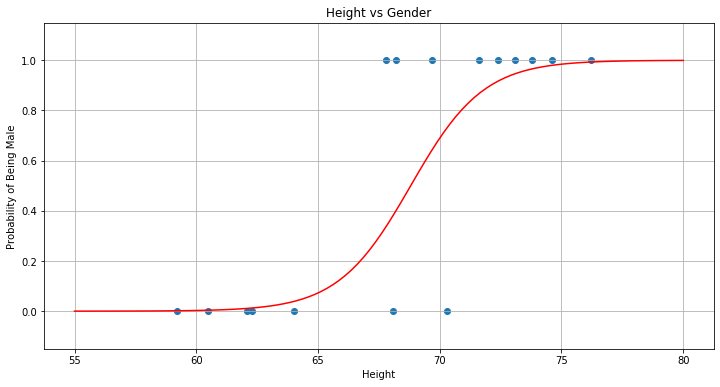

In [95]:
plt.figure(figsize=(12,6))
plt.grid()
plt.title("Height vs Gender")
plt.ylim([-0.15,1.15])
plt.scatter(Height,Gender)
plt.xlabel("Height")
plt.ylabel("Probability of Being Male")

a = linspace(55, 80, 100)
result = []
for i in a:
    result.append(predict(b1,m1,i))
# Your code here

plt.plot(a, result, color = 'red')
plt.show()

###  Part D

Now answer the following two questions:

     (i)  Your professor is 70 inches tall. What is the probability that he is male, according to this algorithm?
     
     (ii) The decision rule associated with this algorithm is that an input height is classified as male if the probability is 0.5 or higher.  Does this algorithm classify your gender correctly?

In [96]:

print("i)The probability that professor is a male when he is 70 inches tall is: 0.752")
print()
print("ii)I am 76 inches tall and a male, the algorithm states that the probability I am a male is 0.9893. Therefore, it was able to correctly classify my gender")



i)The probability that professor is a male when he is 70 inches tall is: 0.752

ii)I am 76 inches tall and a male, the algorithm states that the probability I am a male is 0.9893. Therefore, it was able to correctly classify my gender
